## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [149]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [194]:
data = pd.read_csv('./motorbike_ambulance_calls.csv')

print("General info:")
print(data.describe())

print("Length: ")
print(data.shape)

Основна інформація:
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357  

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [151]:
print("Types:")
print(data.dtypes)

print("\nHow many:")
print(data.count())


Types:
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

How many:
index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [152]:
print(data.isnull().sum())

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**

1. Усі дані було успішно імплементовано. У датасеті міститься 8760 рядків та 15 стовпців.Основна статистична інформація була отримана за допомогою методу describe()
2. Було виведено типи даних для кожної змінної. Усі колонки окрім дати та пори року є числами (int, float).Також була виведена кількість значень по кожній змінній,x звідси ми розкміємо що датасет повний, проте додатково перевіряємо в завданні 3.
Перевірка наявності пропусків:
3. Немає жодних пропущених значень

**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [192]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name], dayfirst=False)
    return df

data2 = tranform_date(data, 'date')


In [191]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min().strftime('%d-%m-%Y')
    last_day = df[date_col_name].max().strftime('%d-%m-%Y')
    print("First: " + first_day)
    print("Last:  " + last_day)

get_time_limits(data2, 'date')


First: 01-01-2011
Last:  31-12-2012


1) Змінна date була перетворена в тип даних datetim, 
з допомого якого ми можемо отрмати дані за певний період.
2) Часові межі датасету були визначені. 

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [196]:
season_mapping = {'spring': 1, 'summer': 2, 'fall': 3, 'winter': 4}
data2['season'] = data['season'].map(season_mapping)

categorical_data = data[['season', 'yr']]

print(categorical_data)



       season  yr
0      spring   0
1      spring   0
2      spring   0
3      spring   0
4      spring   0
...       ...  ..
17374  spring   1
17375  spring   1
17376  spring   1
17377  spring   1
17378  spring   1

[17379 rows x 2 columns]


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [200]:
def encode_season(df: pd.DataFrame, season_col_name: str):

    df = df.dropna(subset=[season_col_name])
    season_mapping = {'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}
    df[season_col_name] = df[season_col_name].map(season_mapping)
    return df

data_encoded = encode_season(data, 'season')
categorical_data2 = data_encoded[['season', 'yr']]
print(categorical_data2)


       season  yr
0           1   0
1           1   0
2           1   0
3           1   0
4           1   0
...       ...  ..
17374       1   1
17375       1   1
17376       1   1
17377       1   1
17378       1   1

[17379 rows x 2 columns]


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

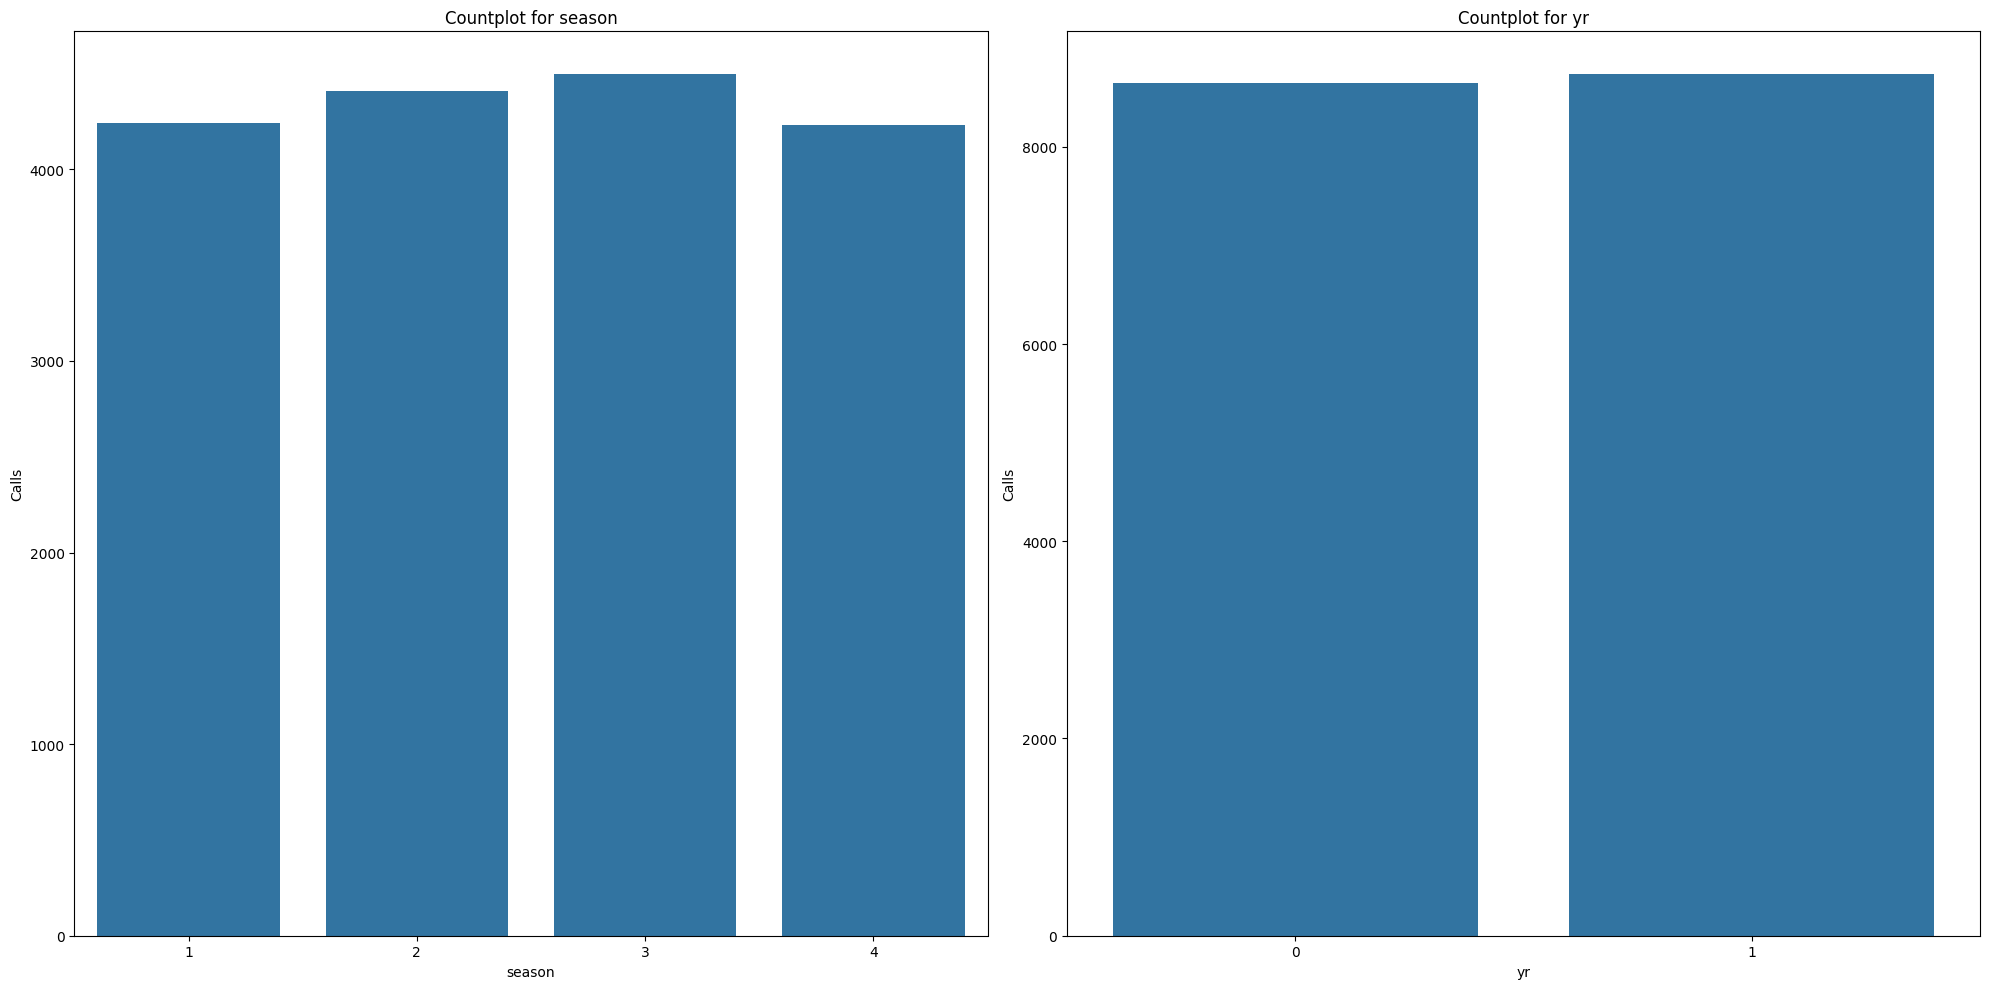

In [223]:
season_map = {0: 'spring', 1: 'summer', 2: 'fall', 3: 'winter'}
yr_map = {0: 2011, 1: 2012}

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for variable, subplot in zip(categorical_data2, ax.flatten()):
    sns.countplot(x=variable, data=categorical_data2, ax=subplot)
    subplot.set_title(f'Countplot for {variable}')
    subplot.set_ylabel('Calls')


plt.tight_layout()
plt.show()


# Season
1 - spring  
2 - summer    
3 - autumn    
4 - winter   

# Year
0 - 2011     
1 - 2012

**Висновки з 5-7 завдання (детальні)**

1. Був створений окремий датасет у якому лежать 2 колонки: season, year - categorical_data2. У назві є цифра 2 так як у різних завданнях датасет не перевикликається і на деякому етапі потрібний датасет без змін.
2. Дані з колонки season, були подані у вигляді чисел. ( Для уточнення Markdown зверху )
3. Створення графіків для  вибірки. У першому - season, у другому - year. ( Для уточнення Markdown зверху )

#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

numeric_data = your_data.select_dtypes(include='number')


In [228]:
data_numerical = data.select_dtypes(include='number')

**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

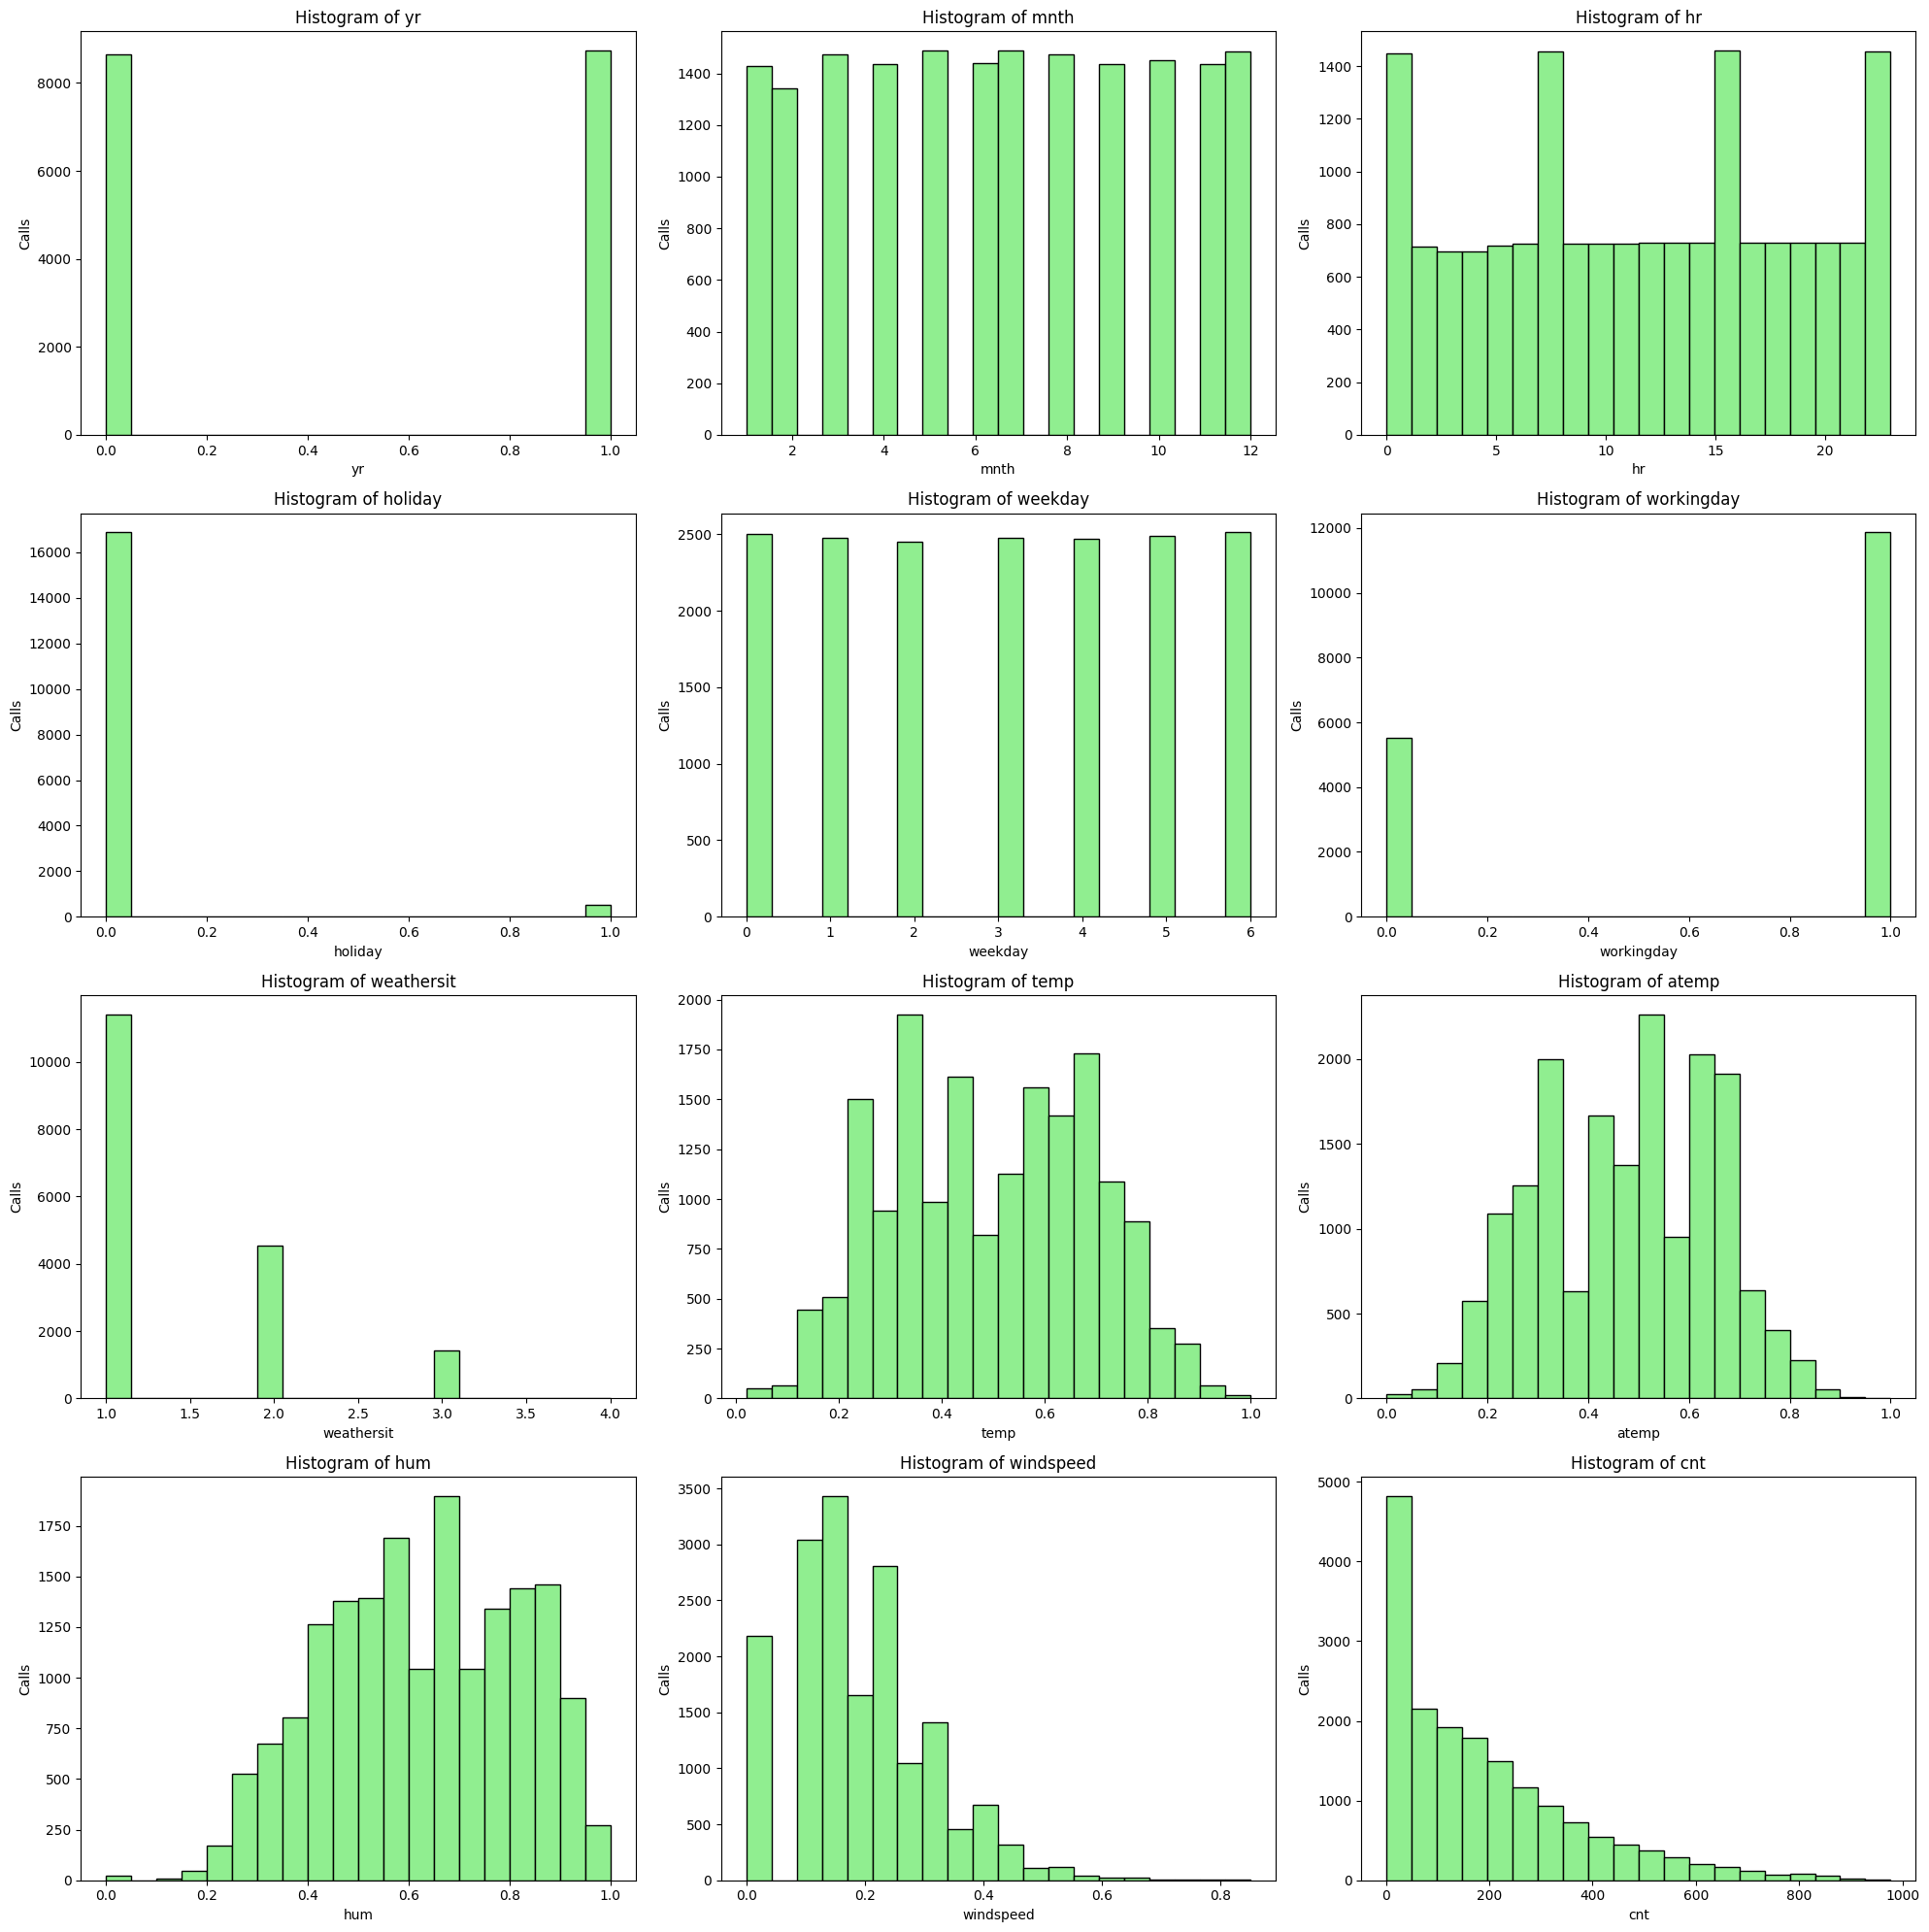

In [260]:
def plot_histograms(data, figsize=(20, 20)):
    fig, ax = plt.subplots(4, 3, figsize=figsize)
    ax = ax.flatten()
    
    for i, col in enumerate(data.columns[1:], start=1):
        ax[i-1].hist(data[col], bins=20, color='lightgreen', edgecolor='black')
        ax[i-1].set_title(f'Histogram of {col}')
        ax[i-1].set_xlabel(col)
        ax[i-1].set_ylabel('Calls')
    
    plt.tight_layout()
    plt.show()

plot_histograms(data_numerical)


**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

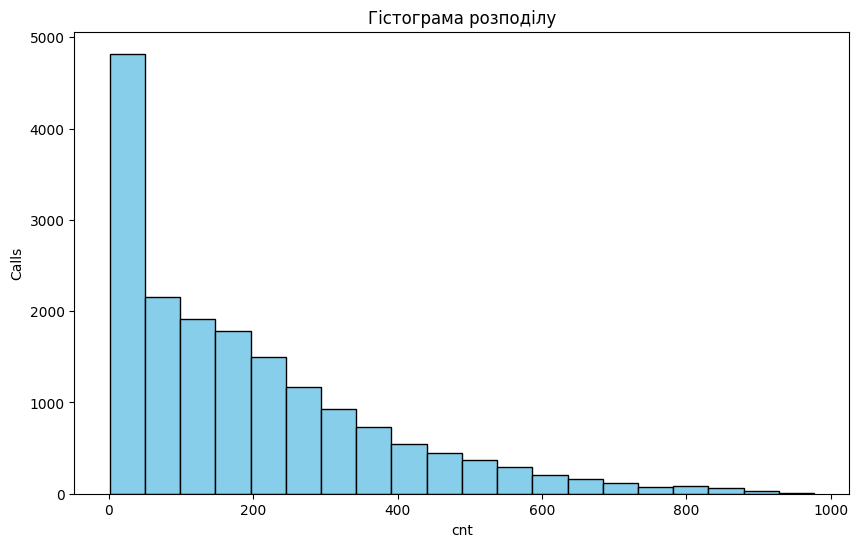

Коефіцієнт нахилу: 0.010064609532772033


In [265]:
def plot_target_distribution_and_slope(data, target_col):
    plt.figure(figsize=(10, 6))
    plt.hist(data[target_col], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution Histogram')
    plt.xlabel(target_col)
    plt.ylabel('Calls')
    plt.show()

    x = data.index.values
    y = data[target_col]
    slope = np.polyfit(x, y, 1)

    print(f"Slope coefficient: {slope}")

plot_target_distribution_and_slope(data, 'cnt')


**Висновки з 8-10 завдання (детальні)**

1.   Було створено окреми датасет з колонками які є числами (int, float)
2.   Було побудовано гістаграми для кожної змінної крім індекса, так як він не дає нам нічог кокорисного
3.   Ми можемо на них побачити що дзвінки відбувались переважно не у святкові дні, на кільскість дзвінків не влинув рік місяць і день тижня, тому можемо побачити рівномірно розпреділені дзвінки....
4.  Побудовано графік загальної кількості дзвінків. Коефіцієнт нахилу вказує на те, що із зростанням значень незалежних змінних, цільова змінна, в середньому, збільшується.

#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

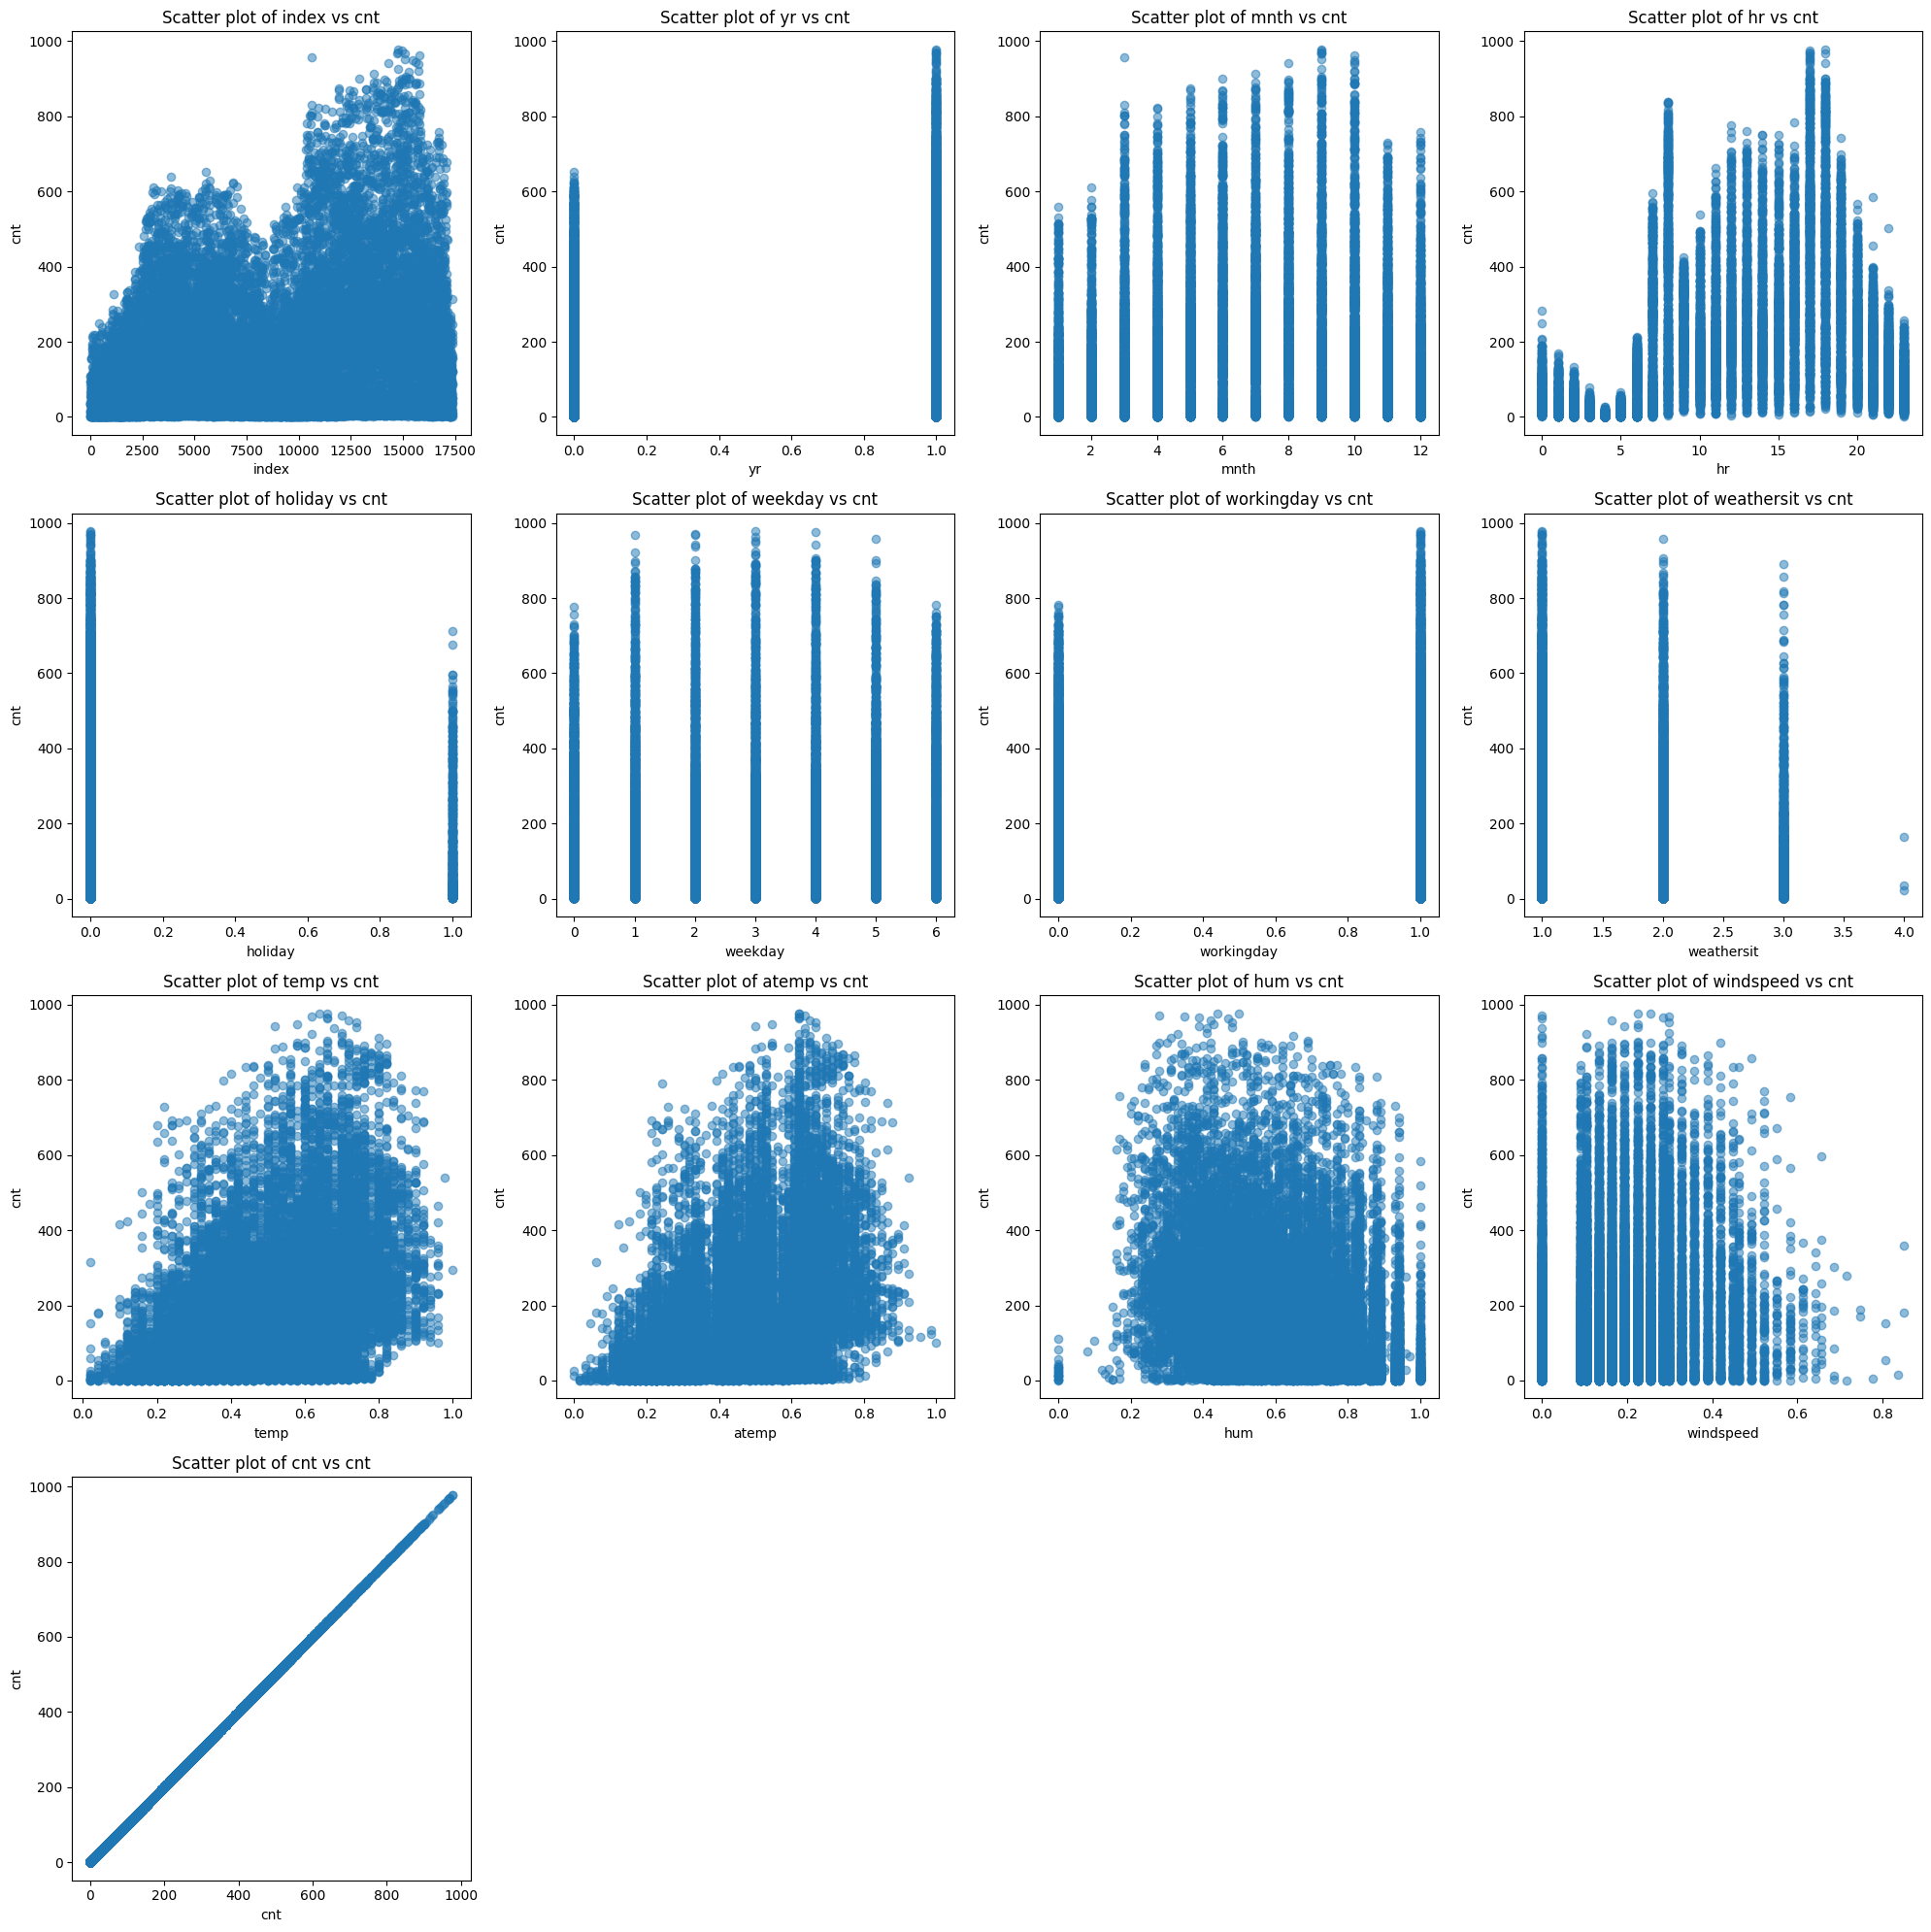

In [275]:
def plot_scatter(data, target_col):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
    
    axes = axes.flatten()
    
    for i, col in enumerate(data_numerical.columns):
        axes[i].scatter(data[col], data[target_col], alpha=0.5)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_col)
        axes[i].set_title(f'Scatter plot of {col} vs {target_col}')
    
    for j in range(len(data_numerical.columns), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_scatter(data, 'cnt')


**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

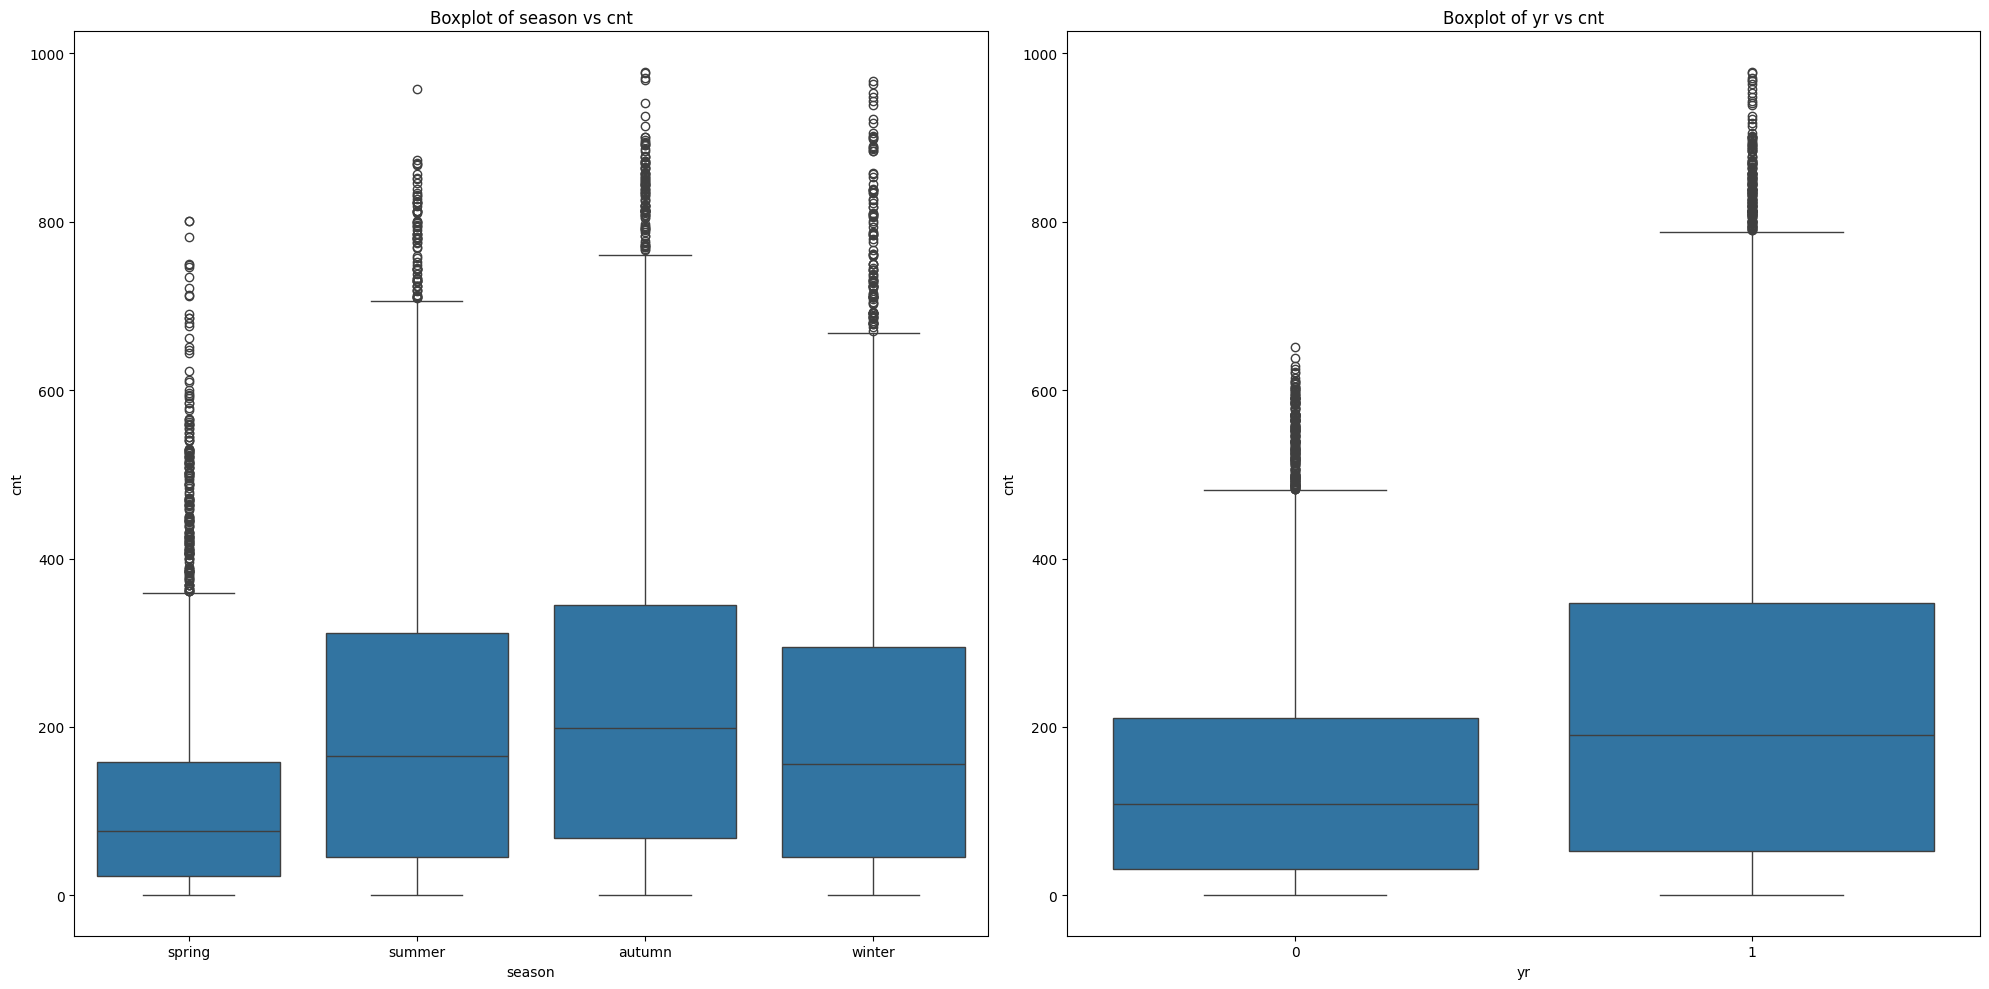

In [278]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

for var, subplot in zip(categorical_data, ax.flatten()):
    sns.boxplot(x=var, y='cnt', data=data, ax=subplot)
    subplot.set_title(f'Boxplot of {var} vs cnt')
    subplot.set_xlabel(var)
    subplot.set_ylabel('cnt')

plt.tight_layout()
plt.show()


**Висновки з 11-12 завдання (детальні)**



1. Завдяки графікам scatterplot можна побачити розподіл змінних у відношенні до цільової змінної, визначивши можливі залежності між ними.
2. Графіки boxplot дозволяють виявити зв'язки між категоріальними змінними та цільовою змінною, підкреслюючи різниці у розподілах.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

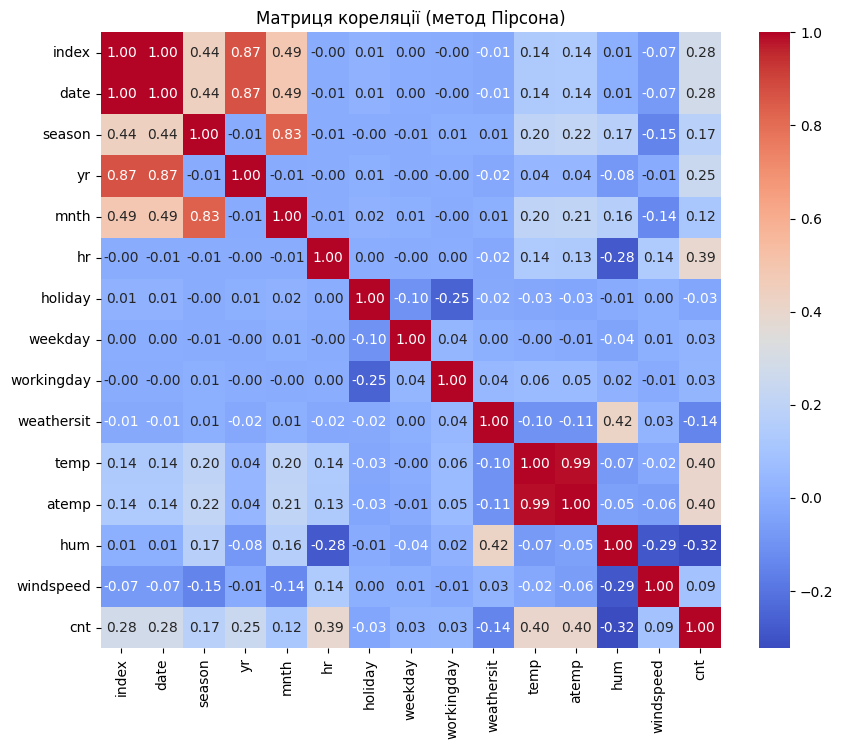

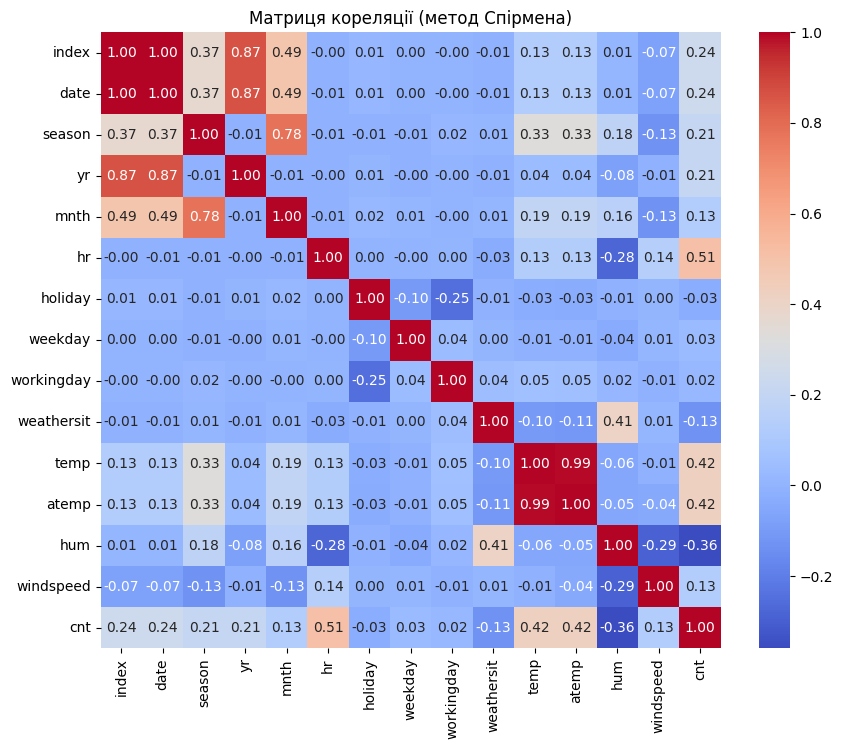

In [280]:
pearson_corr = data2.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Pearson Method)')
plt.show()

spearman_corr = data2.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Spearman Method)')
plt.show()


Використовувався data2 датасет так як у ньому дата була підходящого типу.Коефіцієнти кореляції близькі до 1 вказують на сильну позитивну кореляцію, тоді як коефіцієнти близькі до -1 вказують на сильну негативну кореляцію. Значення близькі до 0 свідчать про відсутність кореляції.
Метод Пірсона оцінює лінійні зв'язки між змінними, тоді як метод Спірмена оцінює будь-який монотонний зв'язок, незалежно від його лінійності.


**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [268]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      # example:
                      pd.get_dummies(df['season']),
                      #YOUR CODE
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return features

In [ ]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [ ]:
features['night_hours'] = #your code
features = features.drop('hr', axis = 1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [ ]:
features_lr = features.drop(['spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

In [ ]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = #your code (all features)
  y = #your code (target variable)
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [ ]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [ ]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1.   
2.   
3. ...

